In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random
import json

dataDir = '/Users/still/Downloads/Measurements 30 rep/express/departments/runA1 split 30'
sample1 = pd.read_csv(dataDir + '/sample1.csv', sep=';', decimal= ',')
sample2 = pd.read_csv(dataDir + '/sample2.csv', sep=';', decimal= ',')
sample3 = pd.read_csv(dataDir + '/sample3.csv', sep=';', decimal= ',')
sample4 = pd.read_csv(dataDir + '/sample4.csv', sep=';', decimal= ',')
sample5 = pd.read_csv(dataDir + '/sample5.csv', sep=';', decimal= ',')

sample6 = pd.read_csv(dataDir + '/sample6.csv', sep=';', decimal= ',')
sample7 = pd.read_csv(dataDir + '/sample7.csv', sep=';', decimal= ',')
sample8 = pd.read_csv(dataDir + '/sample8.csv', sep=';', decimal= ',')
sample9 = pd.read_csv(dataDir + '/sample9.csv', sep=';', decimal= ',')
sample10 = pd.read_csv(dataDir + '/sample10.csv', sep=';', decimal= ',')

sample11 = pd.read_csv(dataDir + '/sample11.csv', sep=';', decimal= ',')
sample12 = pd.read_csv(dataDir + '/sample12.csv', sep=';', decimal= ',')
sample13 = pd.read_csv(dataDir + '/sample13.csv', sep=';', decimal= ',')
sample14 = pd.read_csv(dataDir + '/sample14.csv', sep=';', decimal= ',')
sample15 = pd.read_csv(dataDir + '/sample15.csv', sep=';', decimal= ',')

sample16 = pd.read_csv(dataDir + '/sample16.csv', sep=';', decimal= ',')
sample17 = pd.read_csv(dataDir + '/sample17.csv', sep=';', decimal= ',')
sample18 = pd.read_csv(dataDir + '/sample18.csv', sep=';', decimal= ',')
sample19 = pd.read_csv(dataDir + '/sample19.csv', sep=';', decimal= ',')
sample20 = pd.read_csv(dataDir + '/sample20.csv', sep=';', decimal= ',')

sample21 = pd.read_csv(dataDir + '/sample21.csv', sep=';', decimal= ',')
sample22 = pd.read_csv(dataDir + '/sample22.csv', sep=';', decimal= ',')
sample23 = pd.read_csv(dataDir + '/sample23.csv', sep=';', decimal= ',')
sample24 = pd.read_csv(dataDir + '/sample24.csv', sep=';', decimal= ',')
sample25 = pd.read_csv(dataDir + '/sample25.csv', sep=';', decimal= ',')

sample26 = pd.read_csv(dataDir + '/sample26.csv', sep=';', decimal= ',')
sample27 = pd.read_csv(dataDir + '/sample27.csv', sep=';', decimal= ',')
sample28 = pd.read_csv(dataDir + '/sample28.csv', sep=';', decimal= ',')
sample29 = pd.read_csv(dataDir + '/sample29.csv', sep=';', decimal= ',')
sample30 = pd.read_csv(dataDir + '/sample30.csv', sep=';', decimal= ',')
sample31 = pd.read_csv(dataDir + '/sample31.csv', sep=';', decimal= ',')

In [3]:
def save_powers(df, target):
    for i in range(1,len(df)):
        target.append(df['SPD33.CH1_Power'][i])
    return target

powers = []

save_powers(sample1,powers)
save_powers(sample2,powers)
save_powers(sample3,powers)
save_powers(sample4,powers)
save_powers(sample5,powers)
save_powers(sample6,powers)
save_powers(sample7,powers)
save_powers(sample8,powers)
save_powers(sample9,powers)
save_powers(sample10,powers)
save_powers(sample11,powers)
save_powers(sample12,powers)
save_powers(sample13,powers)
save_powers(sample14,powers)
save_powers(sample15,powers)
save_powers(sample16,powers)
save_powers(sample17,powers)
save_powers(sample18,powers)
save_powers(sample19,powers)
save_powers(sample20,powers)
save_powers(sample21,powers)
save_powers(sample22,powers)
save_powers(sample23,powers)
save_powers(sample24,powers)
save_powers(sample25,powers)
save_powers(sample26,powers)
save_powers(sample27,powers)
save_powers(sample28,powers)
save_powers(sample29,powers)
save_powers(sample30,powers)
save_powers(sample31,powers)

len(powers)

2041

In [4]:
var = np.var(powers)
print(var)


0.018463605350481718


In [5]:
z_score = {80:1.282, 90:1.645, 95:1.960, 98:2.326, 99:2.576}

confidence_level = 98

z = z_score[confidence_level]  # z-score
p = 0.018463605350481718 # maximum variability
q = 1-p
e = (100-confidence_level)/100

n0 = (z**2 * p * q)/e**2
print(f"number of samples when we do not have any knowledge: {n0}")

number of samples when we do not have any knowledge: 245.1220306563675


In [6]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(powers)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    
    

stat=0.683, p=0.000
Probably not Gaussian


In [7]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest

stat, p = normaltest(powers)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    

stat=958.246, p=0.000
Probably not Gaussian


In [8]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = powers
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 218.358
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


In [9]:
sample1 = sample1.reindex()
sample1['oldIndex'] = sample1['index']
sample1 = sample1.drop(columns=['oldIndex'])
sample1 = sample1.reindex()
sample1['newIndex'] = sample1.index

sample2 = sample2.reindex()
sample2['oldIndex'] = sample2['index']
sample2 = sample2.drop(columns=['oldIndex'])
sample2 = sample2.reindex()
sample2['newIndex'] = sample2.index

sample3 = sample3.reindex()
sample3['oldIndex'] = sample3['index']
sample3 = sample3.drop(columns=['oldIndex'])
sample3 = sample3.reindex()
sample3['newIndex'] = sample3.index

sample4 = sample4.reindex()
sample4['oldIndex'] = sample4['index']
sample4 = sample4.drop(columns=['oldIndex'])
sample4 = sample4.reindex()
sample4['newIndex'] = sample4.index

sample5 = sample5.reindex()
sample5['oldIndex'] = sample5['index']
sample5 = sample5.drop(columns=['oldIndex'])
sample5 = sample5.reindex()
sample5['newIndex'] = sample5.index

sample6 = sample6.reindex()
sample6['oldIndex'] = sample6['index']
sample6 = sample6.drop(columns=['oldIndex'])
sample6 = sample6.reindex()
sample6['newIndex'] = sample6.index

sample7 = sample7.reindex()
sample7['oldIndex'] = sample7['index']
sample7 = sample7.drop(columns=['oldIndex'])
sample7 = sample7.reindex()
sample7['newIndex'] = sample7.index

sample8 = sample8.reindex()
sample8['oldIndex'] = sample8['index']
sample8 = sample8.drop(columns=['oldIndex'])
sample8 = sample8.reindex()
sample8['newIndex'] = sample8.index

sample9 = sample9.reindex()
sample9['oldIndex'] = sample9['index']
sample9 = sample9.drop(columns=['oldIndex'])
sample9 = sample9.reindex()
sample9['newIndex'] = sample9.index

sample10 = sample10.reindex()
sample10['oldIndex'] = sample10['index']
sample10 = sample10.drop(columns=['oldIndex'])
sample10 = sample10.reindex()
sample10['newIndex'] = sample10.index

sample11 = sample11.reindex()
sample11['oldIndex'] = sample11['index']
sample11 = sample11.drop(columns=['oldIndex'])
sample11 = sample11.reindex()
sample11['newIndex'] = sample11.index

sample12 = sample12.reindex()
sample12['oldIndex'] = sample12['index']
sample12 = sample12.drop(columns=['oldIndex'])
sample12 = sample12.reindex()
sample12['newIndex'] = sample12.index

sample13 = sample13.reindex()
sample13['oldIndex'] = sample13['index']
sample13 = sample13.drop(columns=['oldIndex'])
sample13 = sample13.reindex()
sample13['newIndex'] = sample13.index

sample14 = sample14.reindex()
sample14['oldIndex'] = sample14['index']
sample14 = sample14.drop(columns=['oldIndex'])
sample14 = sample14.reindex()
sample14['newIndex'] = sample14.index

sample15 = sample15.reindex()
sample15['oldIndex'] = sample15['index']
sample15 = sample15.drop(columns=['oldIndex'])
sample15 = sample15.reindex()
sample15['newIndex'] = sample15.index

sample16 = sample16.reindex()
sample16['oldIndex'] = sample16['index']
sample16 = sample16.drop(columns=['oldIndex'])
sample16 = sample16.reindex()
sample16['newIndex'] = sample16.index

sample17 = sample17.reindex()
sample17['oldIndex'] = sample17['index']
sample17 = sample17.drop(columns=['oldIndex'])
sample17 = sample17.reindex()
sample17['newIndex'] = sample17.index

sample18 = sample18.reindex()
sample18['oldIndex'] = sample18['index']
sample18 = sample18.drop(columns=['oldIndex'])
sample18 = sample18.reindex()
sample18['newIndex'] = sample18.index

sample19 = sample19.reindex()
sample19['oldIndex'] = sample19['index']
sample19 = sample19.drop(columns=['oldIndex'])
sample19 = sample19.reindex()
sample19['newIndex'] = sample19.index

sample20 = sample20.reindex()
sample20['oldIndex'] = sample20['index']
sample20 = sample20.drop(columns=['oldIndex'])
sample20 = sample20.reindex()
sample20['newIndex'] = sample20.index

sample21 = sample21.reindex()
sample21['oldIndex'] = sample21['index']
sample21 = sample21.drop(columns=['oldIndex'])
sample21 = sample21.reindex()
sample21['newIndex'] = sample21.index

sample22 = sample22.reindex()
sample22['oldIndex'] = sample22['index']
sample22 = sample22.drop(columns=['oldIndex'])
sample22 = sample22.reindex()
sample22['newIndex'] = sample22.index

sample23 = sample23.reindex()
sample23['oldIndex'] = sample23['index']
sample23 = sample23.drop(columns=['oldIndex'])
sample23 = sample23.reindex()
sample23['newIndex'] = sample23.index

sample24 = sample24.reindex()
sample24['oldIndex'] = sample24['index']
sample24 = sample24.drop(columns=['oldIndex'])
sample24 = sample24.reindex()
sample24['newIndex'] = sample24.index

sample25 = sample25.reindex()
sample25['oldIndex'] = sample25['index']
sample25 = sample25.drop(columns=['oldIndex'])
sample25 = sample25.reindex()
sample25['newIndex'] = sample25.index

sample26 = sample26.reindex()
sample26['oldIndex'] = sample26['index']
sample26 = sample26.drop(columns=['oldIndex'])
sample26 = sample26.reindex()
sample26['newIndex'] = sample26.index

sample27 = sample27.reindex()
sample27['oldIndex'] = sample27['index']
sample27 = sample27.drop(columns=['oldIndex'])
sample27 = sample27.reindex()
sample27['newIndex'] = sample27.index

sample28 = sample28.reindex()
sample28['oldIndex'] = sample28['index']
sample28 = sample28.drop(columns=['oldIndex'])
sample28 = sample28.reindex()
sample28['newIndex'] = sample28.index

sample29 = sample29.reindex()
sample29['oldIndex'] = sample29['index']
sample29 = sample29.drop(columns=['oldIndex'])
sample29 = sample29.reindex()
sample29['newIndex'] = sample29.index

sample30 = sample30.reindex()
sample30['oldIndex'] = sample30['index']
sample30 = sample30.drop(columns=['oldIndex'])
sample30 = sample30.reindex()
sample30['newIndex'] = sample30.index

sample31 = sample31.reindex()
sample31['oldIndex'] = sample31['index']
sample31 = sample31.drop(columns=['oldIndex'])
sample31 = sample31.reindex()
sample31['newIndex'] = sample31.index

In [10]:
areaSample1t = np.trapz(sample1['SPD33.CH1_Power'], sample1['newIndex'])
areaSample2t = np.trapz(sample2['SPD33.CH1_Power'], sample2['newIndex'])
areaSample3t = np.trapz(sample3['SPD33.CH1_Power'], sample3['newIndex'])
areaSample4t = np.trapz(sample4['SPD33.CH1_Power'], sample4['newIndex'])
areaSample5t = np.trapz(sample5['SPD33.CH1_Power'], sample5['newIndex'])
areaSample6t = np.trapz(sample6['SPD33.CH1_Power'], sample6['newIndex'])
areaSample7t = np.trapz(sample7['SPD33.CH1_Power'], sample7['newIndex'])
areaSample8t = np.trapz(sample8['SPD33.CH1_Power'], sample8['newIndex'])
areaSample9t = np.trapz(sample9['SPD33.CH1_Power'], sample9['newIndex'])
areaSample10t = np.trapz(sample10['SPD33.CH1_Power'], sample10['newIndex'])
areaSample11t = np.trapz(sample11['SPD33.CH1_Power'], sample11['newIndex'])
areaSample12t = np.trapz(sample12['SPD33.CH1_Power'], sample12['newIndex'])
areaSample13t = np.trapz(sample13['SPD33.CH1_Power'], sample13['newIndex'])
areaSample14t = np.trapz(sample14['SPD33.CH1_Power'], sample14['newIndex'])
areaSample15t = np.trapz(sample15['SPD33.CH1_Power'], sample15['newIndex'])
areaSample16t = np.trapz(sample16['SPD33.CH1_Power'], sample16['newIndex'])
areaSample17t = np.trapz(sample17['SPD33.CH1_Power'], sample17['newIndex'])
areaSample18t = np.trapz(sample18['SPD33.CH1_Power'], sample18['newIndex'])
areaSample19t = np.trapz(sample19['SPD33.CH1_Power'], sample19['newIndex'])
areaSample20t = np.trapz(sample20['SPD33.CH1_Power'], sample20['newIndex'])
areaSample21t = np.trapz(sample21['SPD33.CH1_Power'], sample21['newIndex'])
areaSample22t = np.trapz(sample22['SPD33.CH1_Power'], sample22['newIndex'])
areaSample23t = np.trapz(sample23['SPD33.CH1_Power'], sample23['newIndex'])
areaSample24t = np.trapz(sample24['SPD33.CH1_Power'], sample24['newIndex'])
areaSample25t = np.trapz(sample25['SPD33.CH1_Power'], sample25['newIndex'])
areaSample26t = np.trapz(sample26['SPD33.CH1_Power'], sample26['newIndex'])
areaSample27t = np.trapz(sample27['SPD33.CH1_Power'], sample27['newIndex'])
areaSample28t = np.trapz(sample28['SPD33.CH1_Power'], sample28['newIndex'])
areaSample29t = np.trapz(sample29['SPD33.CH1_Power'], sample29['newIndex'])
areaSample30t = np.trapz(sample30['SPD33.CH1_Power'], sample30['newIndex'])
areaSample31t = np.trapz(sample31['SPD33.CH1_Power'], sample31['newIndex'])

In [11]:
meanPowSample1 = sample1['SPD33.CH1_Power'].mean()
meanPowSample2 = sample2['SPD33.CH1_Power'].mean()
meanPowSample3 = sample3['SPD33.CH1_Power'].mean()
meanPowSample4 = sample4['SPD33.CH1_Power'].mean()
meanPowSample5 = sample5['SPD33.CH1_Power'].mean()
meanPowSample6 = sample6['SPD33.CH1_Power'].mean()
meanPowSample7 = sample7['SPD33.CH1_Power'].mean()
meanPowSample8 = sample8['SPD33.CH1_Power'].mean()
meanPowSample9 = sample9['SPD33.CH1_Power'].mean()
meanPowSample10 = sample10['SPD33.CH1_Power'].mean()
meanPowSample11 = sample11['SPD33.CH1_Power'].mean()
meanPowSample12 = sample12['SPD33.CH1_Power'].mean()
meanPowSample13 = sample13['SPD33.CH1_Power'].mean()
meanPowSample14 = sample14['SPD33.CH1_Power'].mean()
meanPowSample15 = sample15['SPD33.CH1_Power'].mean()
meanPowSample16 = sample16['SPD33.CH1_Power'].mean()
meanPowSample17 = sample17['SPD33.CH1_Power'].mean()
meanPowSample18 = sample18['SPD33.CH1_Power'].mean()
meanPowSample19 = sample19['SPD33.CH1_Power'].mean()
meanPowSample20 = sample20['SPD33.CH1_Power'].mean()
meanPowSample21 = sample21['SPD33.CH1_Power'].mean()
meanPowSample22 = sample22['SPD33.CH1_Power'].mean()
meanPowSample23 = sample23['SPD33.CH1_Power'].mean()
meanPowSample24 = sample24['SPD33.CH1_Power'].mean()
meanPowSample25 = sample25['SPD33.CH1_Power'].mean()
meanPowSample26 = sample26['SPD33.CH1_Power'].mean()
meanPowSample27 = sample27['SPD33.CH1_Power'].mean()
meanPowSample28 = sample28['SPD33.CH1_Power'].mean()
meanPowSample29 = sample29['SPD33.CH1_Power'].mean()
meanPowSample30 = sample30['SPD33.CH1_Power'].mean()
meanPowSample31 = sample31['SPD33.CH1_Power'].mean()

In [12]:
lengthSample1 = len(sample1)
lengthSample2 = len(sample2)
lengthSample3 = len(sample3)
lengthSample4 = len(sample4)
lengthSample5 = len(sample5)
lengthSample6 = len(sample6)
lengthSample7 = len(sample7)
lengthSample8 = len(sample8)
lengthSample9 = len(sample9)
lengthSample10 = len(sample10)
lengthSample11 = len(sample11)
lengthSample12 = len(sample12)
lengthSample13 = len(sample13)
lengthSample14 = len(sample14)
lengthSample15 = len(sample15)
lengthSample16 = len(sample16)
lengthSample17 = len(sample17)
lengthSample18 = len(sample18)
lengthSample19 = len(sample19)
lengthSample20 = len(sample20)
lengthSample21 = len(sample21)
lengthSample22 = len(sample22)
lengthSample23 = len(sample23)
lengthSample24 = len(sample24)
lengthSample25 = len(sample25)
lengthSample26 = len(sample26)
lengthSample27 = len(sample27)
lengthSample28 = len(sample28)
lengthSample29 = len(sample29)
lengthSample30 = len(sample30)
lengthSample31 = len(sample31)

In [13]:
areaSample1 = sample1['SPD33.CH1_Power'].mean() * lengthSample1
areaSample2 = sample2['SPD33.CH1_Power'].mean() * lengthSample2
areaSample3 = sample3['SPD33.CH1_Power'].mean() * lengthSample3
areaSample4 = sample4['SPD33.CH1_Power'].mean() * lengthSample4
areaSample5 = sample5['SPD33.CH1_Power'].mean() * lengthSample5
areaSample6 = sample6['SPD33.CH1_Power'].mean() * lengthSample6
areaSample7 = sample7['SPD33.CH1_Power'].mean() * lengthSample7
areaSample8 = sample8['SPD33.CH1_Power'].mean() * lengthSample8
areaSample9 = sample9['SPD33.CH1_Power'].mean() * lengthSample9
areaSample10 = sample10['SPD33.CH1_Power'].mean() * lengthSample10
areaSample11 = sample11['SPD33.CH1_Power'].mean() * lengthSample11
areaSample12 = sample12['SPD33.CH1_Power'].mean() * lengthSample12
areaSample13 = sample13['SPD33.CH1_Power'].mean() * lengthSample13
areaSample14 = sample14['SPD33.CH1_Power'].mean() * lengthSample14
areaSample15 = sample15['SPD33.CH1_Power'].mean() * lengthSample15
areaSample16 = sample16['SPD33.CH1_Power'].mean() * lengthSample16
areaSample17 = sample17['SPD33.CH1_Power'].mean() * lengthSample17
areaSample18 = sample18['SPD33.CH1_Power'].mean() * lengthSample18
areaSample19 = sample19['SPD33.CH1_Power'].mean() * lengthSample19
areaSample20 = sample20['SPD33.CH1_Power'].mean() * lengthSample20
areaSample21 = sample21['SPD33.CH1_Power'].mean() * lengthSample21
areaSample22 = sample22['SPD33.CH1_Power'].mean() * lengthSample22
areaSample23 = sample23['SPD33.CH1_Power'].mean() * lengthSample23
areaSample24 = sample24['SPD33.CH1_Power'].mean() * lengthSample24
areaSample25 = sample25['SPD33.CH1_Power'].mean() * lengthSample25
areaSample26 = sample26['SPD33.CH1_Power'].mean() * lengthSample26
areaSample27 = sample27['SPD33.CH1_Power'].mean() * lengthSample27
areaSample28 = sample28['SPD33.CH1_Power'].mean() * lengthSample28
areaSample29 = sample29['SPD33.CH1_Power'].mean() * lengthSample29
areaSample30 = sample30['SPD33.CH1_Power'].mean() * lengthSample30
areaSample31 = sample31['SPD33.CH1_Power'].mean() * lengthSample31

In [14]:
meanPowers = pd.DataFrame([meanPowSample1, meanPowSample2, meanPowSample3, meanPowSample4, meanPowSample5, meanPowSample6, meanPowSample7, meanPowSample8, meanPowSample9, meanPowSample10,
meanPowSample11, meanPowSample12, meanPowSample13, meanPowSample14, meanPowSample15, meanPowSample16, meanPowSample17, meanPowSample18, meanPowSample19, meanPowSample20,
meanPowSample21, meanPowSample22, meanPowSample23, meanPowSample24, meanPowSample25, meanPowSample26, meanPowSample27, meanPowSample28, meanPowSample29, meanPowSample30, meanPowSample31]) 

meanPowers['run'] = meanPowers.index + 1
meanPowers.rename(columns={0:'meanPow'}, inplace=True)
meanPowers

,meanPow,run
0,2.171642,1
1,2.163636,2
2,2.229104,3
3,2.157463,4
4,2.186765,5
5,2.205224,6
6,2.161940,7
7,2.191912,8
8,2.145522,9
9,2.262879,10


In [15]:
times = pd.DataFrame([lengthSample1, lengthSample2, lengthSample3, lengthSample4, lengthSample5, lengthSample6, lengthSample7, lengthSample8, lengthSample9, lengthSample10,
lengthSample11, lengthSample12, lengthSample13, lengthSample14, lengthSample15, lengthSample16, lengthSample17, lengthSample18, lengthSample19, lengthSample20,
lengthSample21, lengthSample22, lengthSample23, lengthSample24, lengthSample25, lengthSample26, lengthSample27, lengthSample28, lengthSample29, lengthSample30, lengthSample31]) 

times['run'] = times.index + 1
times.rename(columns={0:'time'}, inplace=True)
times

,time,run
0,67,1
1,66,2
2,67,3
3,67,4
4,68,5
5,67,6
6,67,7
7,68,8
8,67,9
9,66,10


In [16]:
areas = pd.DataFrame([areaSample1, areaSample2, areaSample3, areaSample4, areaSample5, areaSample6, areaSample7, areaSample8, areaSample9, areaSample10,
                  areaSample11, areaSample12, areaSample13, areaSample14, areaSample15, areaSample16, areaSample17, areaSample18, areaSample19, areaSample20,
                  areaSample21, areaSample22,  areaSample23,  areaSample24,  areaSample25,  areaSample26,  areaSample27,  areaSample28,  areaSample29,  areaSample30,  areaSample31])  
areas['run'] = areas.index + 1

areas.rename(columns={0:'area'}, inplace=True)
areas

,area,run
0,145.50,1
1,142.80,2
2,149.35,3
3,144.55,4
4,148.70,5
5,147.75,6
6,144.85,7
7,149.05,8
8,143.75,9
9,149.35,10


In [17]:
areasT = pd.DataFrame([areaSample1t, areaSample2t, areaSample3t, areaSample4t, areaSample5t, areaSample6t, areaSample7t, areaSample8t, areaSample9t, areaSample10t,
                  areaSample11t, areaSample12t, areaSample13t, areaSample14t, areaSample15t, areaSample16t, areaSample17t, areaSample18t, areaSample19t, areaSample20t,
                  areaSample21t, areaSample22t,  areaSample23t,  areaSample24t,  areaSample25t,  areaSample26t,  areaSample27t,  areaSample28t,  areaSample29t,  areaSample30t,  areaSample31t])  
areasT['run'] = areasT.index + 1
areasT.rename(columns={0:'area'}, inplace=True)
areasT

,area,run
0,143.325,1
1,140.600,2
2,147.250,3
3,142.500,4
4,146.650,5
5,145.700,6
6,142.800,7
7,147.000,8
8,141.600,9
9,147.300,10


<Axes: xlabel='run', ylabel='area'>

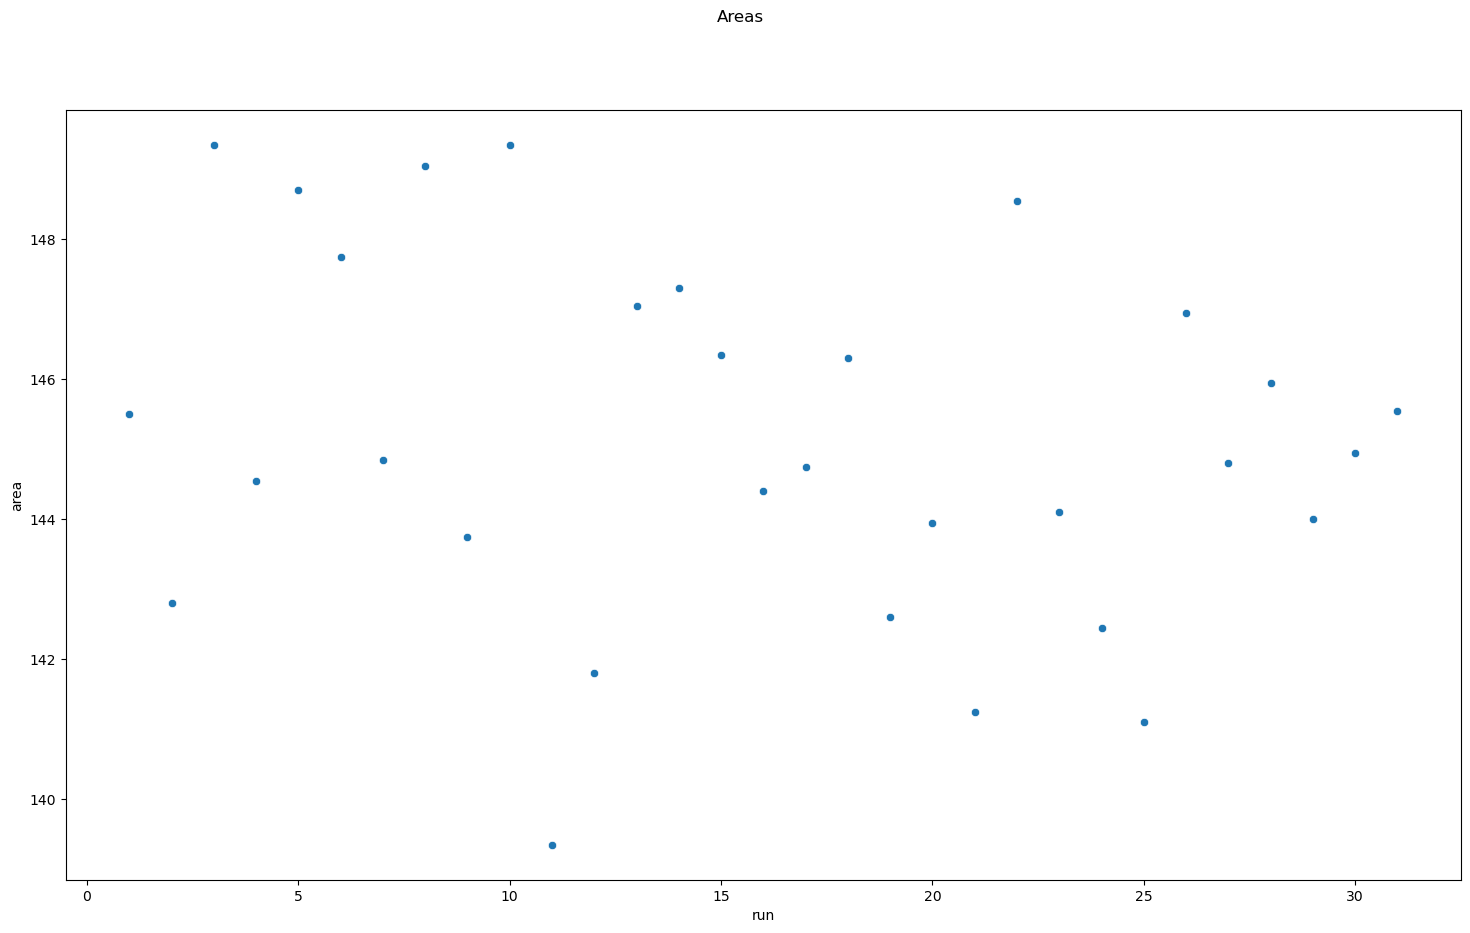

In [18]:
# plot areas to check for patterns
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
fig.suptitle('Areas')
sns.scatterplot(data=areas, x='run', y='area')

<Axes: xlabel='area', ylabel='Count'>

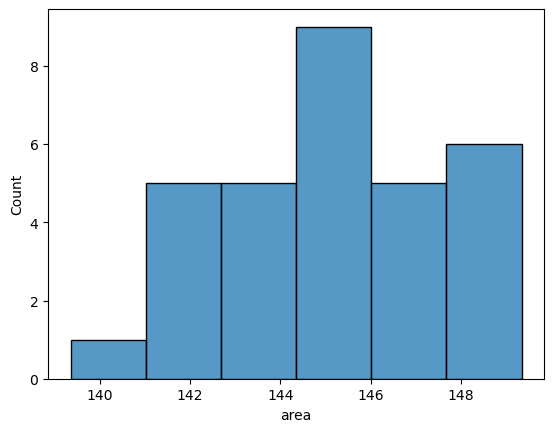

In [19]:
# histogram of all calculated areas 
sns.histplot(data=areas, x='area')

Text(0.5, 9.444444444444438, 'Energy Consumption (J)')

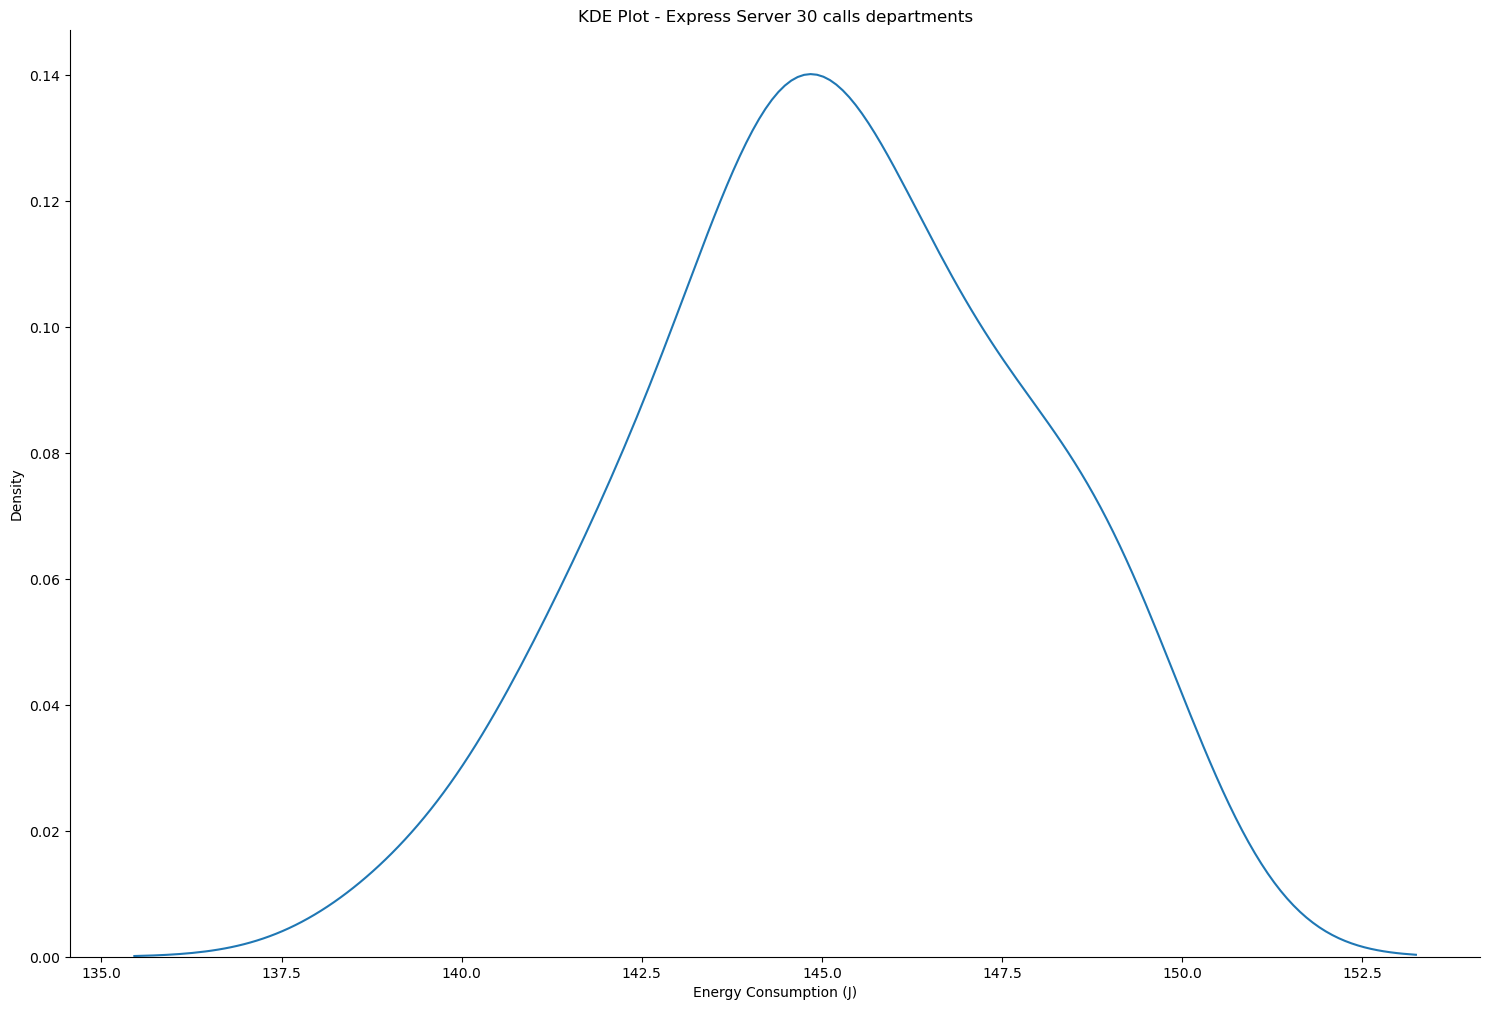

In [20]:
sns.displot(data=areas, x='area', kind='kde', height=10, aspect=1.5)
plt.title("KDE Plot - Express Server 30 calls departments")
plt.xlabel("Energy Consumption (J)")

<Axes: xlabel='area'>

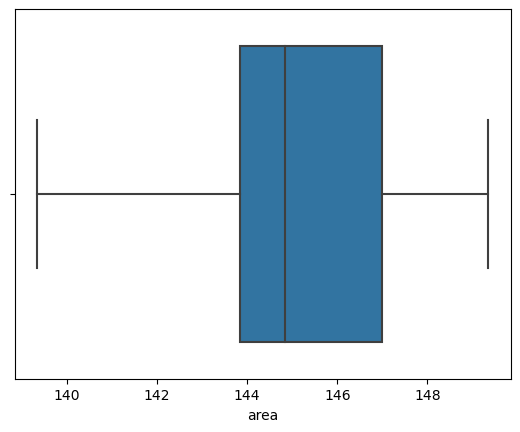

In [21]:
sns.boxplot(data=areas, x='area')

In [22]:
meanPowers.to_csv('/Users/still/Downloads/Exported/expressServerDepartmentsMeanPowers.csv', index=False)

In [23]:
times.to_csv('/Users/still/Downloads/Exported/expressServerDepartmentsTimes.csv', index=False)

In [24]:
areas.to_csv('/Users/still/Downloads/Exported/expressServerDepartmentsAreas.csv', index=False)

In [25]:
areasT.to_csv('/Users/still/Downloads/Exported/expressServerDepartmentsAreasT.csv', index=False)

In [26]:
with open('/Users/still/Downloads/Exported/expressServerDepartmentsAllPowers.txt', 'w') as f:
    for line in powers:
        f.write(f"{line}\n")